In [1]:
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

data = pd.read_csv('./input1.csv',sep=',',header=None,names=['x1','x2','y'])
y = torch.from_numpy(data.y.values)
x = torch.from_numpy(data.drop(['y'],axis=1).values).float()
yc = torch.where(y==-1,torch.zeros(17,dtype=torch.long),y)
x.shape,y.shape

(torch.Size([17, 2]), torch.Size([17]))

In [2]:
d1 = data[data.y!=-1]
d2 = data[data.y!=1]
c1,c2 = d1['x1'].values,d1['x2'].values
c3,c4 = d2['x1'].values,d2['x2'].values

In [3]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(2,1)
    def forward(self,x):
        x = self.layer1(x)
        return x
    
net = Net()
output = net(x);output

tensor([[ 0.4824],
        [-1.8744],
        [ 1.2044],
        [-1.4054],
        [-2.6646],
        [ 1.5334],
        [-2.6413],
        [ 0.4746],
        [-1.8511],
        [-1.0531],
        [-2.6957],
        [-3.0187],
        [ 1.5334],
        [-2.2734],
        [-0.8001],
        [-1.4754],
        [-1.6447]], grad_fn=<AddmmBackward>)

In [ ]:
F.soft_margin_loss(output,y.view(-1,1).float())

In [15]:
epochs = 10000
lr = 0.01
loss_fn = nn.SoftMarginLoss()
optimizer = torch.optim.SGD(net.parameters(),lr=0.01)
weights = []

for epoch in range(epochs):
    optimizer.zero_grad()
    output = net(x)
    loss = loss_fn(output,y.view(-1,1).float())
    loss.backward()
    optimizer.step()
    weights.append([net.layer1.weight[0][0].item(),
                    net.layer1.weight[0][1].item(),
                    net.layer1.bias[0].item()])
    if epoch%(epochs/20) ==0: print(loss.item())
    output[output>0]=1;output[output<0]=-1
    if torch.all(output==y.view(-1,1)):
        break

0.16808706521987915


In [16]:
output[output>0]=1;output[output<0]=-1
output==y.view(-1,1)

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

In [56]:
w =  weights[-1];w,type(w)

([-0.44813644886016846, -0.23840726912021637, 3.671322822570801], list)

In [44]:
w[0]/-w[1] *1 + w[2]/w[0]

-10.072131490047193

In [45]:
def y_hat(w,x):
    x@w[:2]
    return  w2/-w1 * x2 + b/w1

In [61]:
w = torch.tensor(w)
x1 = torch.cat((x.clone().detach(),torch.ones(17,1)),dim=-1)

/Users/aymanjabri/opt/anaconda3/envs/Pytorch/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.


In [70]:
p = x1@w
p[p>0]=1;p[p<0]=-1
p.eq(y)

tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True])

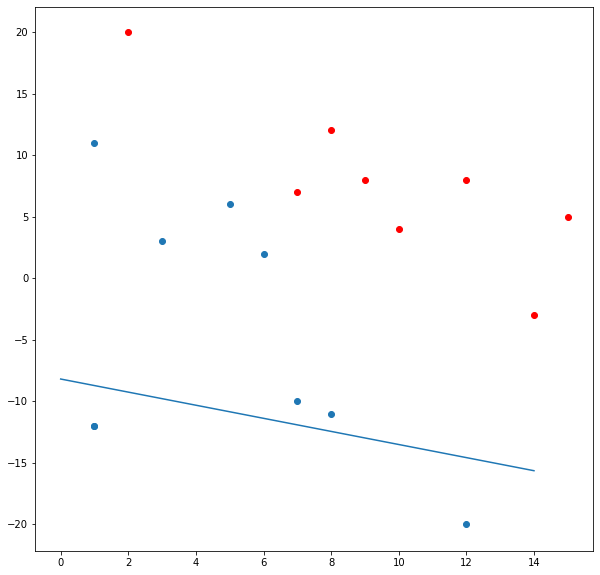

In [34]:
x1 = torch.linspace(0,14,steps=20)
x2 = y_hat(w[0],w[1],w[2],x1)

plt.figure(figsize=(10,10))
plt.scatter(c3,c4,c = 'r')
plt.scatter(c1,c2)
plt.plot(x1,x2)

In [ ]:
def Perceptron(x,y,lr):
    n,dim = list(x.shape)
    x = torch.cat([torch.ones(n).view(-1,1),x],dim=1)
#     W = np.random.rand(num_features+1).reshape((-1,1))
    w = torch.rand(dim+1,dtype=torch.float,requires_grad=True)

    miss_classified = True
    while miss_classified:
        samples_misclassified = False
        predict = x@w
        predict[predict>0]=1;predict[predict<0]=-1
        if predict.eq(y.view(-1,1)).sum()!=len(y):
            miss_classified=True
            with torch.no_grad():
                w.sub_(lr * w.grad)
                w.grad.zero_()
    return w

In [ ]:
Perceptron(x,y,1e-2)

In [ ]:
n,dim = list(x.shape)
X = torch.cat([torch.ones(n).view(-1,1),x],dim=1)
# w = torch.rand(dim+1,dtype=torch.float,requires_grad=True)
w = nn.Linear(3,1)

miss_classified = True
while miss_classified:
    samples_misclassified = False
    predict = X@w
    predict[predict>0]=1;predict[predict<0]=-1
    if predict.eq(y.view(-1,1)).sum()!=len(y):
        miss_classified=True
        with torch.no_grad():
            w.sub_(lr * w.grad)
            w.grad.zero_()

In [9]:
x

tensor([[  8., -11.],
        [  7.,   7.],
        [ 12., -20.],
        [ 14.,  -3.],
        [ 12.,   8.],
        [  1., -12.],
        [ 15.,   5.],
        [  7., -10.],
        [ 10.,   4.],
        [  6.,   2.],
        [  8.,  12.],
        [  2.,  20.],
        [  1., -12.],
        [  9.,   8.],
        [  3.,   3.],
        [  5.,   6.],
        [  1.,  11.]])

In [ ]:
list(x.shape)

In [67]:
def activation(x):
    x = torch.where(x<0,torch.tensor([-1]),torch.tensor([1]))
    return 

In [ ]:
activation(net(x))==y.view(-1,1)
    

In [ ]:
a = torch.tensor([-1])
b = torch.tensor([1])

In [ ]:
torch.where(y>0,a,b)

In [ ]:
y

In [ ]:
a = nn.Parameter(torch.tensor([0,1.,1]));a

In [ ]:
X = torch.cat([torch.ones(17).view(-1,1),x],dim=1);X

In [ ]:
torch.all()